## Домашнее задание "Методология ведения DS-проектов"

#### Преподаватель: Алексей Кузьмин
### Возьмите задачу с винами (www.kaggle.com...ne-quality) и решите ее, оформив в виде CrispDM-подхода.
! Только для тех у кого уже диплом ! Оформите задачи по дипломной работе в виде этапов CrispDM (например, в trello). Пришлите скриншот.

# 1. Понимание бизнеса

## 1.1 Цель
Предсказать предпочтения вин путем извлечения данных из физико-химических свойств.

## 1.2 Описание

Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде".

Классы упорядочены и не сбалансированы (например, нормальных вин пьют больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут использоваться для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны.

# 2. Data Understanding

## 2.1 Import Libraries

In [134]:
# utilities
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Modelling Algorithms

from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## 2.2 Вспомогательные функции

In [3]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 6, df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df_wine.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

## 2.3 Загрузка данных

In [78]:
df_wine = pd.read_csv('D:\DATA_SCIENCE\DZ\zak-5\winequalityN.csv')


In [79]:
print ('Datasets:' , 'df_wine:' , df_wine.shape )

Datasets: df_wine: (6497, 13)


## 2.4 Статистика и визуализации

In [80]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Описание переменных:
###### Входные переменные (на основе физико-химических тестов):
* 1 - фиксированная кислотность
* 2 - летучая кислотность
* 3 - лимонная кислота
* 4 - остаточный сахар
* 5 - хлориды
* 6 - свободный диоксид серы
* 7 - общий диоксид серы
* 8 - плотность
* 9 - pH
* 10 - сульфаты
* 11 - спирт
###### Выходная переменная (на основе сенсорных данных):
* 12 - качество (оценка от 0 до 10)

In [81]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 2.4.1 Далее взглянем на некоторую ключевую информацию о переменных

In [8]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Оценка вин распределена от 3 до 9, средняя - 6.
Часть данных в образцах имеет пропуски.

In [9]:
df_wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### 2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

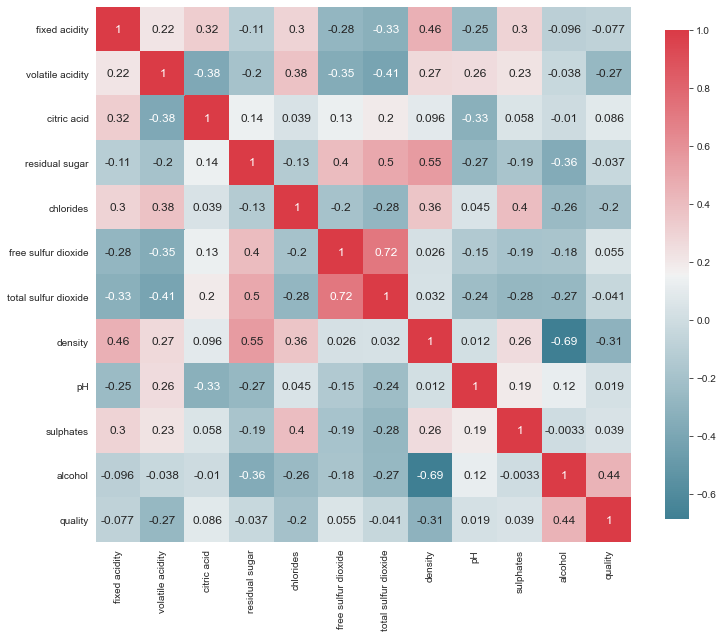

In [10]:
plot_correlation_map(df_wine)

In [11]:
abs(df_wine.corr()["quality"]).sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265953
chlorides               0.200886
citric acid             0.085706
fixed acidity           0.077031
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038729
residual sugar          0.036825
pH                      0.019366
Name: quality, dtype: float64

##### Наиболее коррелирует с оценкой вина: алкоголь, плотность, летучая кислотность; меньше хлориды.

In [12]:
# Рассмотрим распределение по оценкам вин
df_wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

##### Основные оценки вина приходятся на средние значения

#### Рассмотрим взаимосвязь между цветом вина и оценкой вина

<AxesSubplot:xlabel='type', ylabel='quality'>

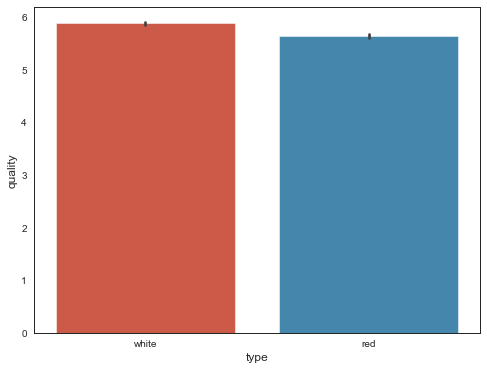

In [13]:
sns.barplot(x = "type", y = "quality", data = df_wine)

##### Цвет вина влияет на оценку равным образом.

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

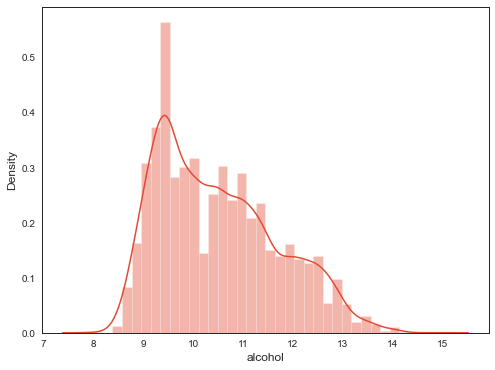

In [14]:
sns.distplot(df_wine["alcohol"])

<AxesSubplot:xlabel='density', ylabel='Density'>

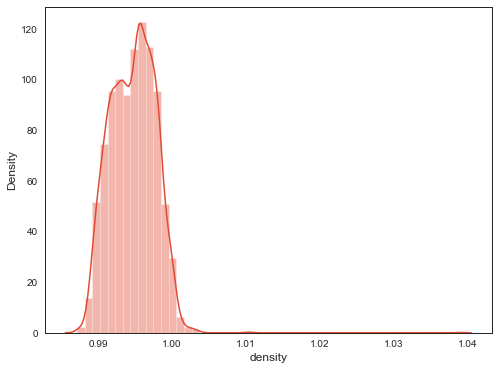

In [15]:
sns.distplot(df_wine["density"])

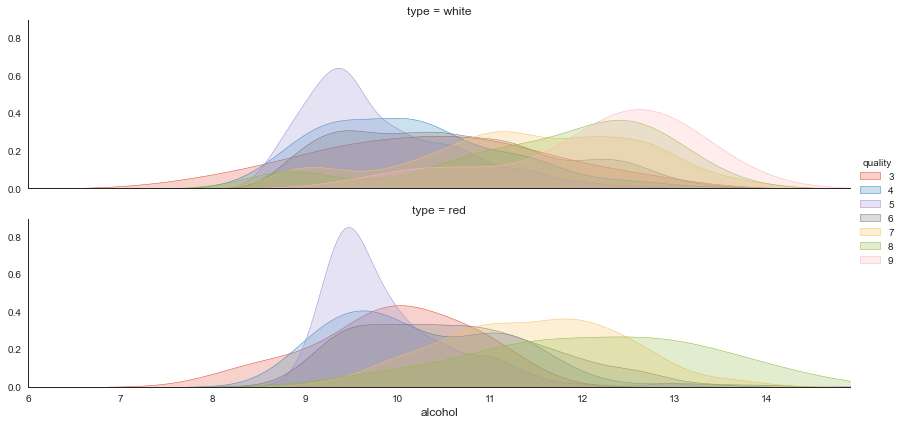

In [16]:
plot_distribution( df_wine , var = 'alcohol' , target = 'quality', row = 'type' )

Плотность распределения оценки вина от наличия алкоголя. Наилучшм образом отражено среднее качество вина.

# 3. Data Preparation

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

##### Переведём номинальный признак 'Тип вина' в категориальный 'color_wine' (red - 0, white - 1)

In [82]:
df_wine['color_wine'] = LabelEncoder().fit_transform(df_wine['type'].values)

##### Разделим оценки вин на ниже и выше среднего

In [83]:
df_wine.quality[df_wine.quality.values < 5] = 0
df_wine.quality[df_wine.quality.values > 7] = 2
df_wine.quality[(df_wine.quality.values >= 5) & (df_wine.quality.values <= 7)] = 1
df_wine.quality.unique()

array([1, 2, 0], dtype=int64)

In [84]:
df_wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_wine
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,1,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1,0


## 3.2 Заполнить пропущенные значения в переменных медианным значением


In [85]:
df_wine["fixed acidity"] = df_wine.groupby("type")["fixed acidity"].transform(lambda x: x.fillna(x.median()))

df_wine["volatile acidity"] = df_wine.groupby("type")["volatile acidity"].transform(lambda x: x.fillna(x.median()))

df_wine["citric acid"] = df_wine.groupby("type")["citric acid"].transform(lambda x: x.fillna(x.median()))

df_wine["residual sugar"] = df_wine.groupby("type")["residual sugar"].transform(lambda x: x.fillna(x.median()))

df_wine["chlorides"] = df_wine.groupby("type")["chlorides"].transform(lambda x: x.fillna(x.median()))

df_wine["pH"] = df_wine.groupby("type")["pH"].transform(lambda x: x.fillna(x.median()))

df_wine["sulphates"] = df_wine.groupby("type")["sulphates"].transform(lambda x: x.fillna(x.median()))

In [86]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_wine
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.62,11.2,1,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [87]:
df_wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color_wine              0
dtype: int64

## 3.3 Feature Engineering &ndash; добавляем новые признаки

### 3.3.1 Добавляем три признака: низкий, средний, высокий сахар

In [118]:
df= df_wine.copy()

In [119]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_wine
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.62,11.2,1,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [120]:
low_sugar = df['residual sugar'][df['residual sugar'].values < df['residual sugar'].quantile(0.25)]
medium_sugar =   df['residual sugar'][(df['residual sugar'].values >= df['residual sugar'].quantile(0.25)) & 
                         (df['residual sugar'].values <= df['residual sugar'].quantile(0.75))]
high_sugar = df['residual sugar'][df['residual sugar'].values > df['residual sugar'].quantile(0.75)]

In [121]:
def get_group(x):
    if x in low_sugar.index:
        return 'low_sugar'
    elif x in medium_sugar.index:
        return 'medium_sugar'
    else:
        return 'high_sugar' 
df['residual sugar'] = df['residual sugar'].apply(get_group)
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_wine
6492,red,6.2,0.600,0.08,medium_sugar,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
6493,red,5.9,0.550,0.10,high_sugar,0.062,39.0,51.0,0.99512,3.52,0.62,11.2,1,0
6494,red,6.3,0.510,0.13,high_sugar,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0
6495,red,5.9,0.645,0.12,medium_sugar,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0
6496,red,6.0,0.310,0.47,high_sugar,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1,0


In [122]:
n = pd.get_dummies(df['residual sugar'])
df = pd.concat([df, n], axis=1)
df = df.drop('residual sugar', axis=1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_wine,high_sugar,low_sugar,medium_sugar
0,white,7.0,0.27,0.36,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1,1,0,0
1,white,6.3,0.30,0.34,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1,1,0,0
2,white,8.1,0.28,0.40,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1,1,0,0
3,white,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,1,0,0
4,white,7.2,0.23,0.32,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,1,0,0


In [123]:
df = df.drop('type', axis=1)
df

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_wine,high_sugar,low_sugar,medium_sugar
0,7.0,0.270,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,1,1,0,0
1,6.3,0.300,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1,1,0,0
2,8.1,0.280,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1,1,0,0
3,7.2,0.230,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1,1,0,0
4,7.2,0.230,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0,0,0,1
6493,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.62,11.2,1,0,1,0,0
6494,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0,1,0,0
6495,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0,0,0,1


## 3.4 Сборка финальных датасетов для моделирования

### 3.4.1 Variable selection
Выбираем признаки для формирования итогового датасет. У нас доступны признаки:

    fixed acidity
    volatile acidity
    citric acid
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    pH
    sulphates
    alcohol
    quality
    color_wine
    high_sugar
    low_sugar
    medium_sugar

### 3.4.2 Создание датасетов

Отделяем данные для обучения и для проверки

In [ ]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = full_X[ 0:891 ]
train_valid_y = titanic.Survived
test_X = full_X[ 891: ]
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

print (full_X.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 15) (623, 15) (268, 15) (623,) (268,) (418, 15)


In [179]:
Y = df['quality']
X = df.drop("quality", axis = 1)

Y.shape, X.shape

((6497,), (6497, 14))

In [180]:
std = StandardScaler()
std.fit_transform(X)

array([[-0.16690731, -0.4231179 ,  0.2843011 , ...,  0.30471484,
        -0.1894036 , -0.23021377],
       [-0.70711849, -0.24082568,  0.14658083, ...,  0.30471484,
        -0.1894036 , -0.23021377],
       [ 0.68199598, -0.36235383,  0.55974164, ...,  0.30471484,
        -0.1894036 , -0.23021377],
       ...,
       [-0.70711849,  1.03521982, -1.299482  , ...,  0.30471484,
        -0.1894036 , -0.23021377],
       [-1.0158106 ,  1.85553478, -1.36834214, ..., -3.28175678,
        -0.1894036 ,  4.34378884],
       [-0.93863757, -0.18006161,  1.04176259, ...,  0.30471484,
        -0.1894036 , -0.23021377]])

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.3, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train , train_size = 0.9, random_state = 42)
print (x_train.shape, y_train.shape,  x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)

(4092, 14) (4092,) (455, 14) (455,) (1950, 14) (1950,)


### 3.4.3 Важность признаков
Отбор оптимальных признаков для модели имеет важное значение. Теперь мы попытаемся оценить, какие переменные являются наиболее важными, чтобы сделать прогноз.

1.0


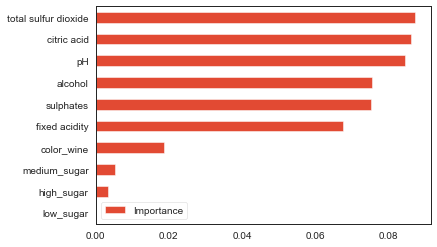

In [183]:
plot_variable_importance(x_train, y_train)

# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Выбор модели
Хорошей отправной точкой является логистическая регрессия.

In [184]:
model = LogisticRegression()

## 4.2 Обучение модели

In [185]:
model.fit(x_train, y_train)

LogisticRegression()

# 5. Оценка
Теперь мы собираемся оценить модель

## 5.1 Модель
Мы можем оценить точность модели, используя набор для валидации, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

Затем мы сравниваем точность с точностью при использовании модели на тренировочных данных. Если разница между ними значительна, это свидетельствует о переобучении. Мы стараемся избегать этого, потому что это означает, что модель не будет хорошо обобщаться на новые данные (будет работать плохо)

In [186]:
# Score the model
print (model.score(x_train, y_train) , model.score(x_valid, y_valid))

0.9281524926686217 0.9406593406593406


# 6. Развертывание

Развертывание в данном означает публикацию полученного прогноза в таблицу лидеров Kaggle.

In [187]:
y_pred = model.predict(x_test)

In [188]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      1947
           2       0.00      0.00      0.00         3

    accuracy                           0.94      1950
   macro avg       0.33      0.31      0.32      1950
weighted avg       1.00      0.94      0.97      1950



In [325]:
test = pd.DataFrame({'quantity_true': y_test, 'quantity_pred': y_pred} )
test


,quantity_true,quantity_pred
3103,1,1
1419,1,1
4761,1,1
4690,1,1
4032,1,1
...,...,...
4294,1,1
3757,1,1
5954,1,1
4418,1,1
